In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
df = pd.read_csv("loan_prediction.csv")
df.columns#printing all the columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [47]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [48]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Both numerical and categorical values are present in database

In [49]:
#Checking unique values in target column
df['Loan_Status'].nunique()

2

Since we have only two values in target column hence it is a classification problem


In [50]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:

df['LoanAmount'].fillna(value=df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(value=df['Credit_History'].mean(), inplace=True)

In [52]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
#dropping null data of object type
df = df.dropna(axis = 0, how ='any')

In [54]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Null value cleared

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            554 non-null    object 
 1   Gender             554 non-null    object 
 2   Married            554 non-null    object 
 3   Dependents         554 non-null    object 
 4   Education          554 non-null    object 
 5   Self_Employed      554 non-null    object 
 6   ApplicantIncome    554 non-null    int64  
 7   CoapplicantIncome  554 non-null    float64
 8   LoanAmount         554 non-null    float64
 9   Loan_Amount_Term   554 non-null    float64
 10  Credit_History     554 non-null    float64
 11  Property_Area      554 non-null    object 
 12  Loan_Status        554 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 60.6+ KB


Shape of dataset is 554 rows and 13 columns

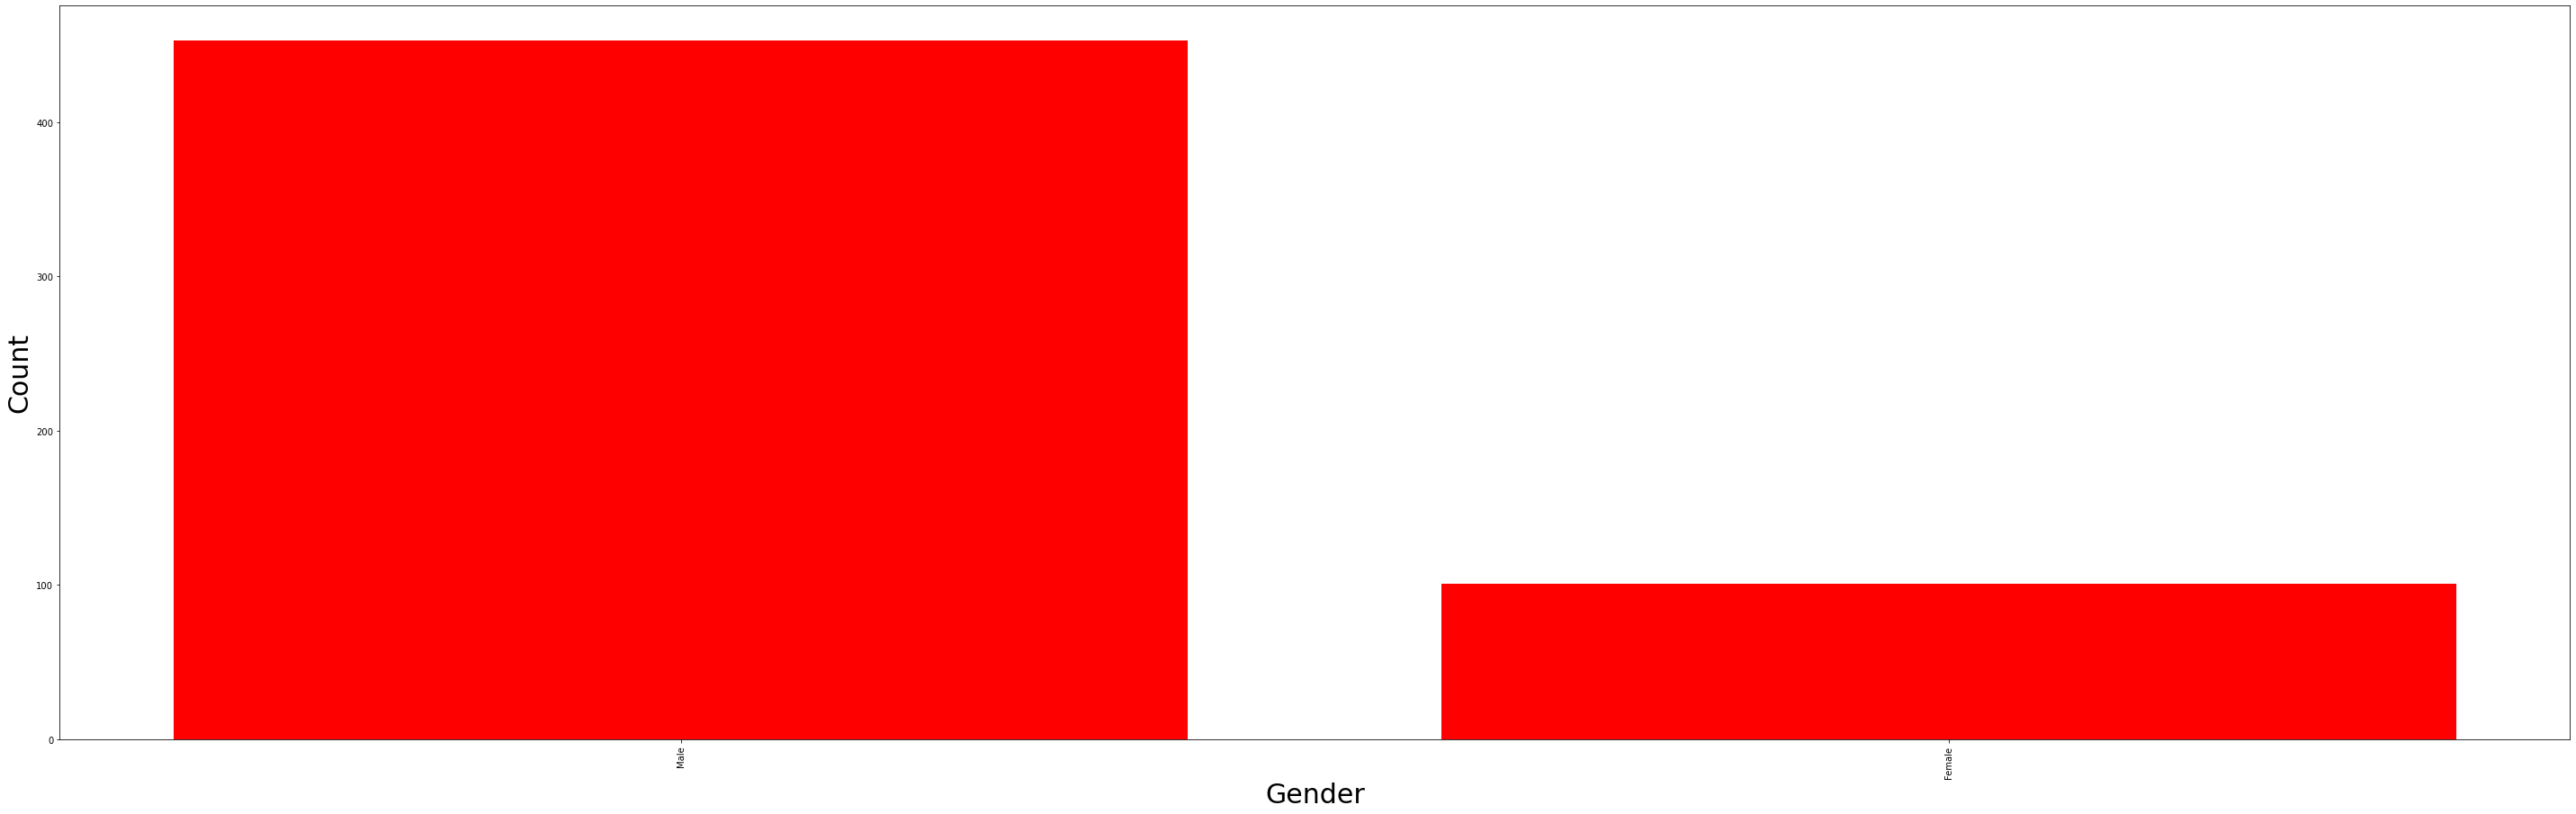

In [11]:
plt.figure(figsize=(50,15))
plt.bar(list(df['Gender'].unique()),list(df['Gender'].value_counts()),color = 'r')
plt.xticks(rotation=90)
plt.xlabel("Gender",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.show()

Male      453,
Female    101

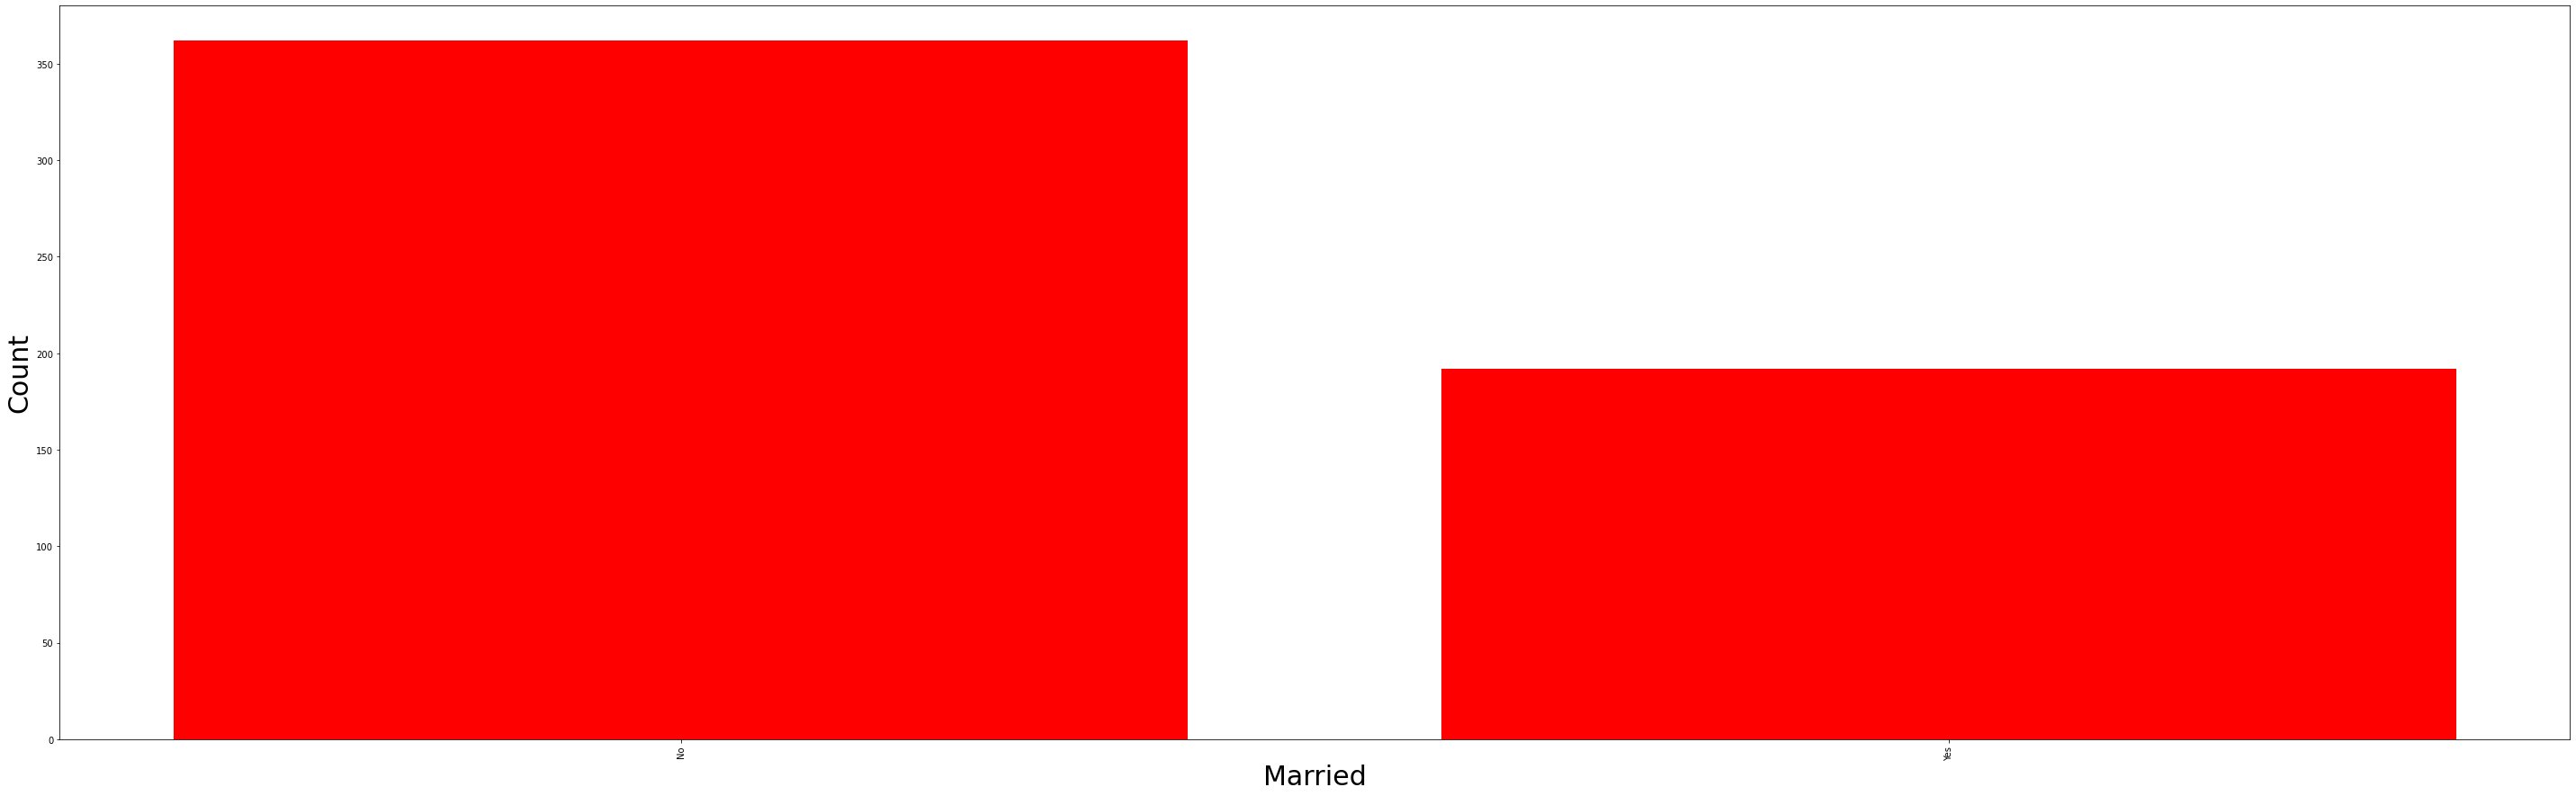

In [12]:
plt.figure(figsize=(50,15))
plt.bar(list(df['Married'].unique()),list(df['Married'].value_counts()),color = 'r')
plt.xticks(rotation=90)
plt.xlabel("Married",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.show()

Married:
Yes    362,
No     192

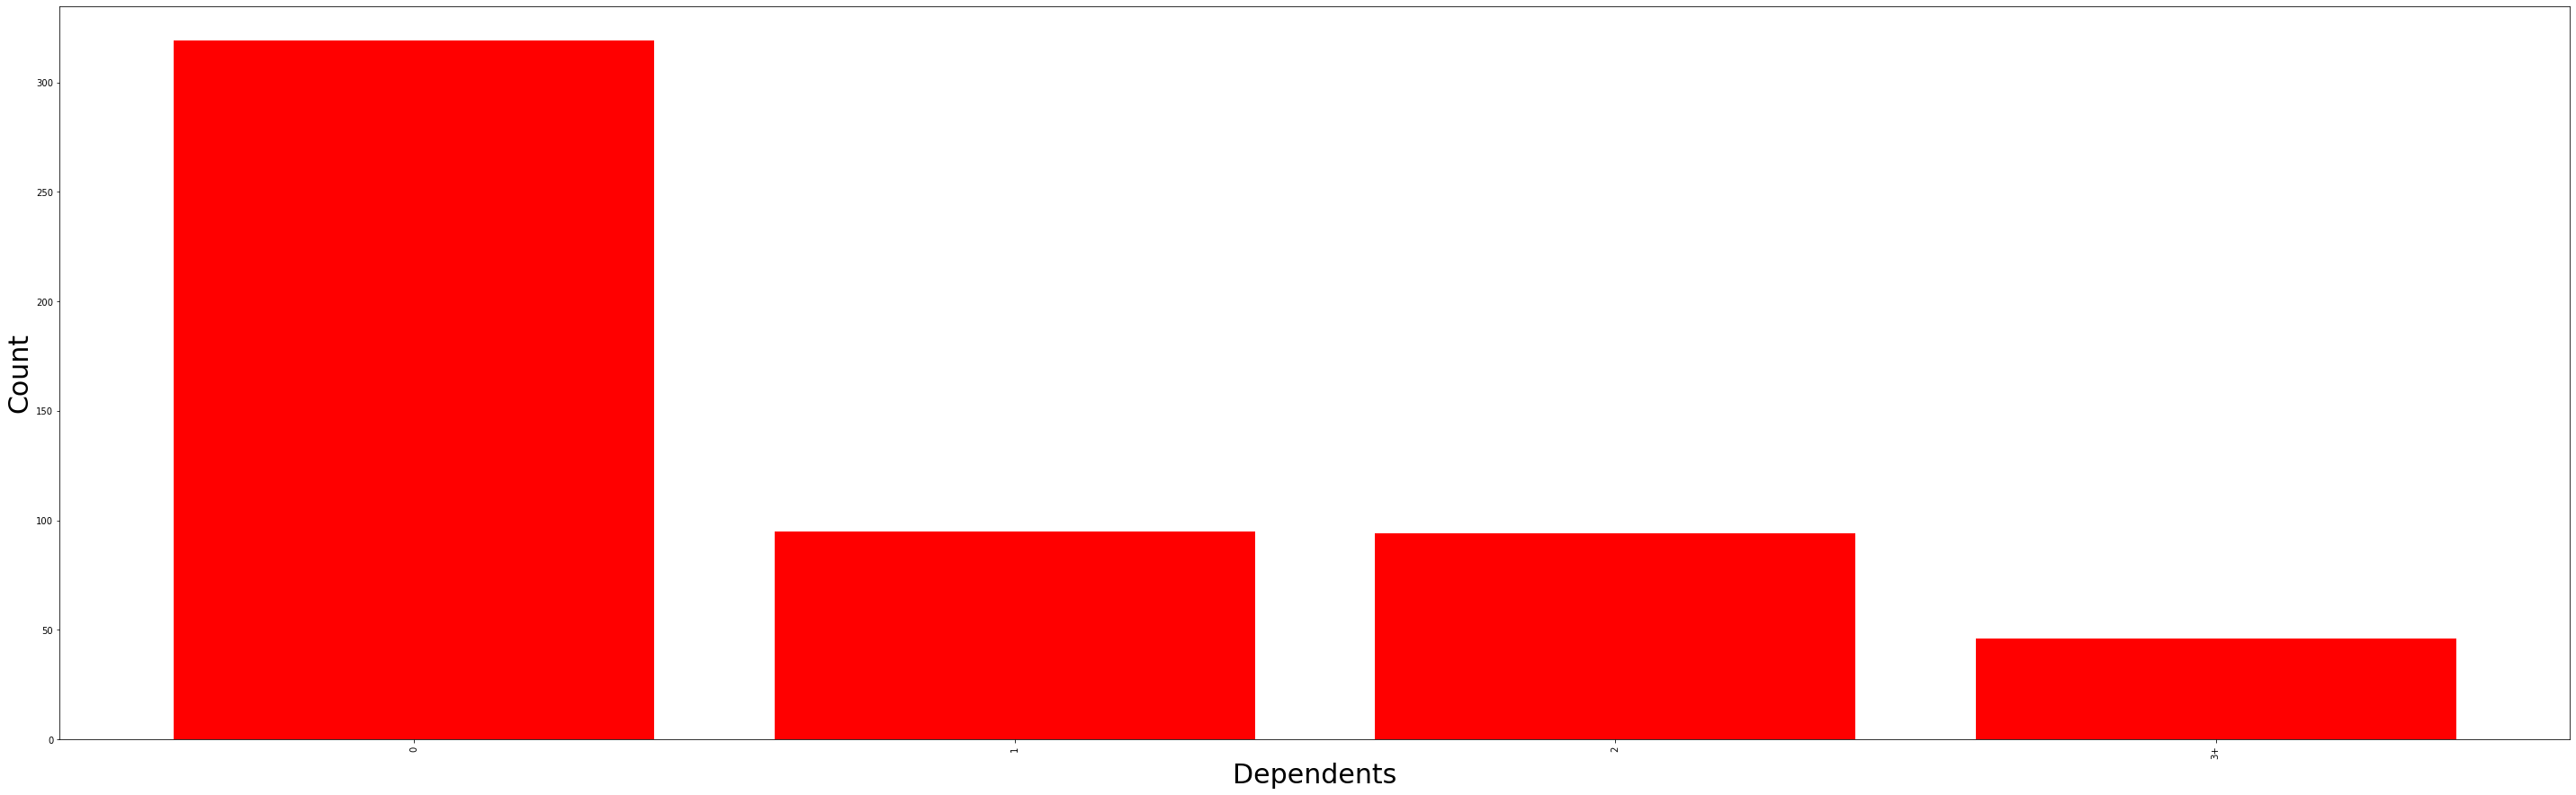

In [13]:
plt.figure(figsize=(50,15))
plt.bar(list(df['Dependents'].unique()),list(df['Dependents'].value_counts()),color = 'r')
plt.xticks(rotation=90)
plt.xlabel("Dependents",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.show()

Dependents:
0     -319,
1      -95,
2      -94,
3+     -46

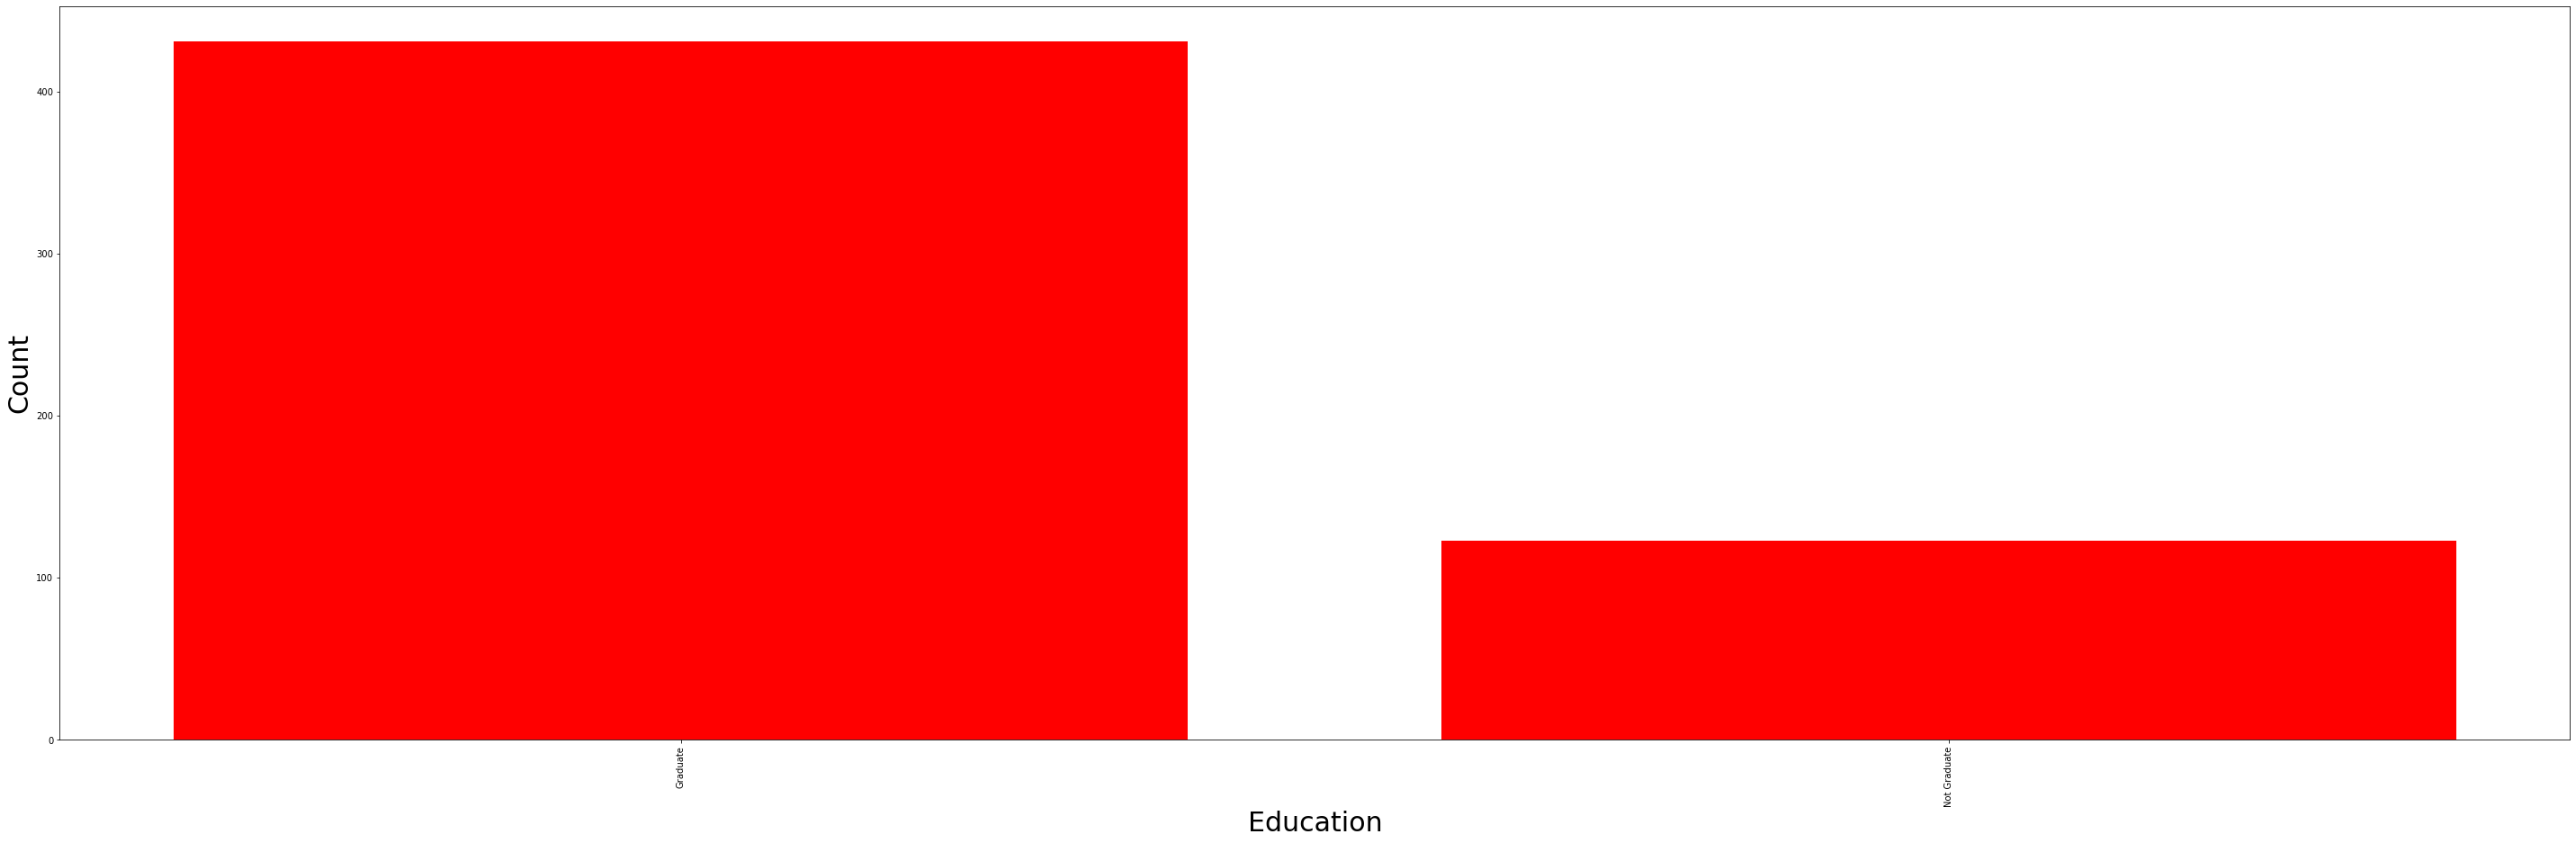

In [14]:
plt.figure(figsize=(50,15))
plt.bar(list(df['Education'].unique()),list(df['Education'].value_counts()),color = 'r')
plt.xticks(rotation=90)
plt.xlabel("Education",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.show()

Education:
Graduate        -431,
Not Graduate    -123

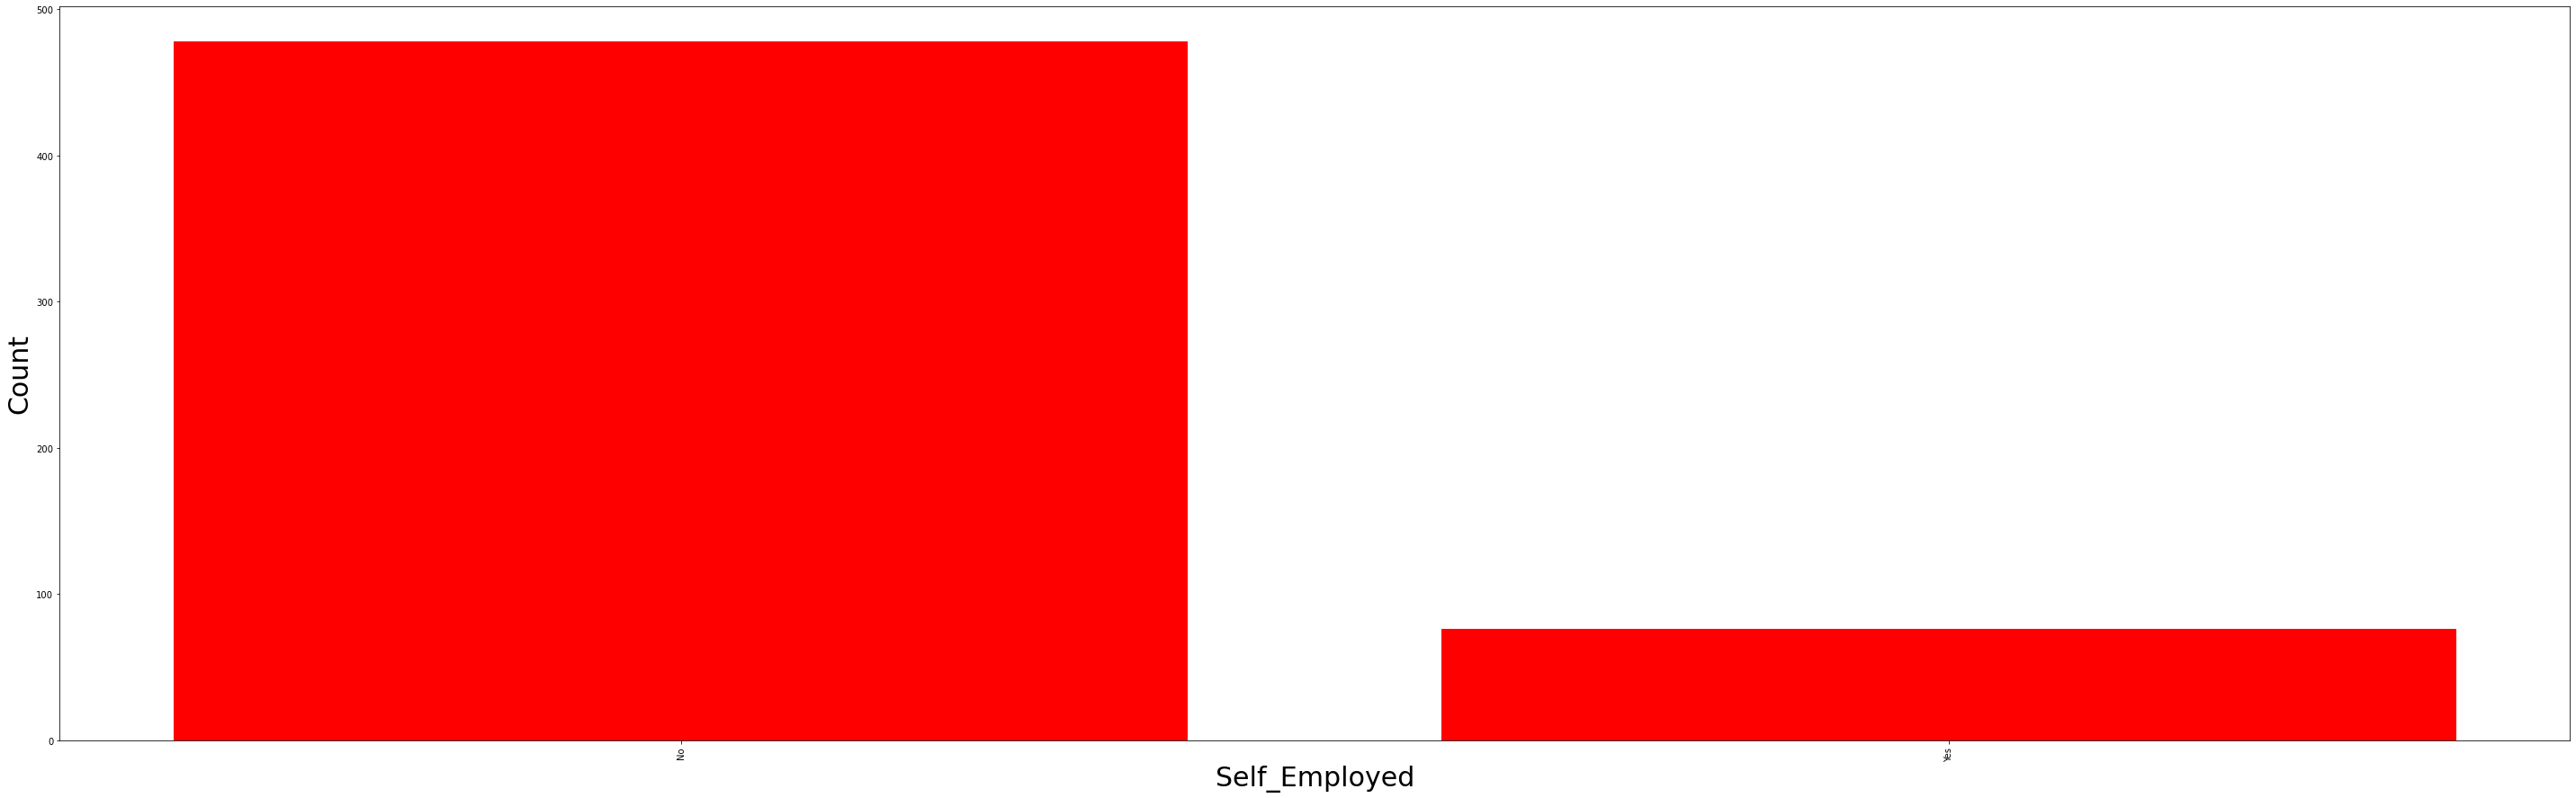

In [15]:
plt.figure(figsize=(50,15))
plt.bar(list(df['Self_Employed'].unique()),list(df['Self_Employed'].value_counts()),color = 'r')
plt.xticks(rotation=90)
plt.xlabel("Self_Employed",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.show()

Self employed:
No     -478,
Yes     -76

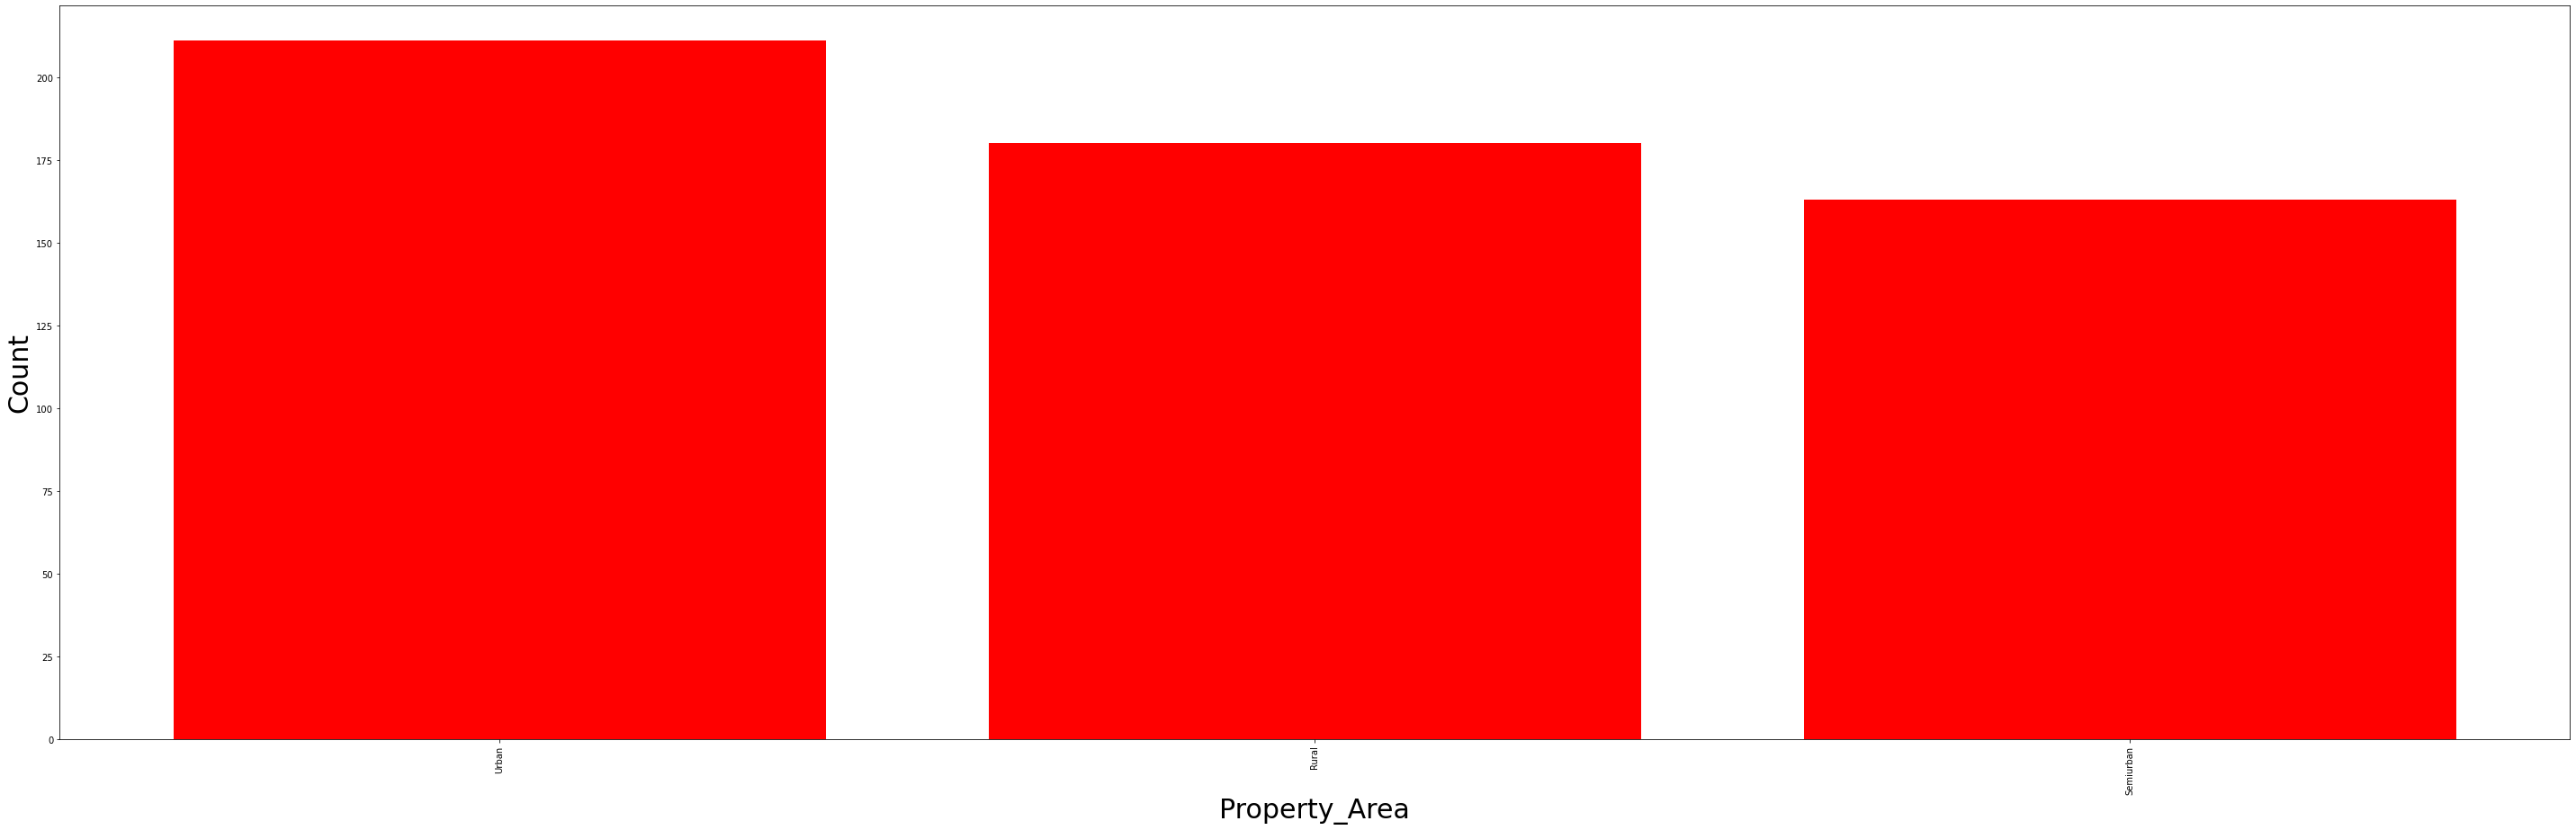

In [16]:
plt.figure(figsize=(50,15))
plt.bar(list(df['Property_Area'].unique()),list(df['Property_Area'].value_counts()),color = 'r')
plt.xticks(rotation=90)
plt.xlabel("Property_Area",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.show()

Property Area:
    Semiurban    -211,
Urban        -180,
Rural        -163

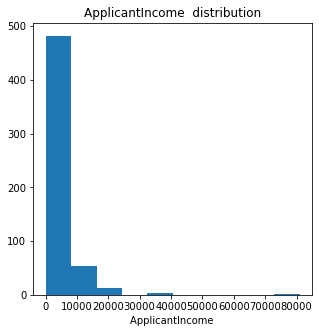

In [17]:
plt.figure(figsize=(5,5))
plt.hist(df['ApplicantIncome'])
plt.title('ApplicantIncome  distribution')
plt.xlabel("ApplicantIncome ")
plt.show()

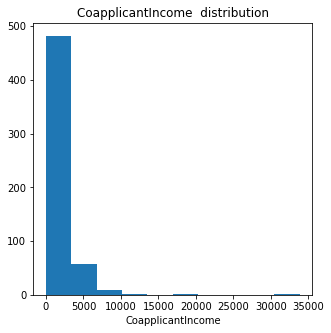

In [18]:
plt.figure(figsize=(5,5))
plt.hist(df['CoapplicantIncome'])
plt.title('CoapplicantIncome  distribution')
plt.xlabel("CoapplicantIncome")
plt.show()

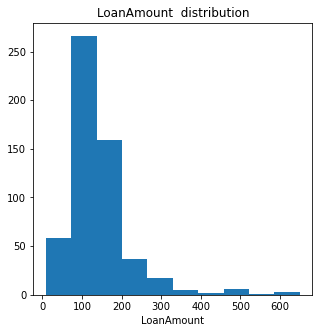

In [19]:
plt.figure(figsize=(5,5))
plt.hist(df['LoanAmount'])
plt.title('LoanAmount  distribution')
plt.xlabel("LoanAmount")
plt.show()

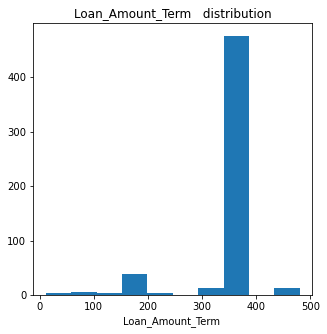

In [20]:
plt.figure(figsize=(5,5))
plt.hist(df['Loan_Amount_Term'])
plt.title('Loan_Amount_Term   distribution')
plt.xlabel("Loan_Amount_Term ")
plt.show()

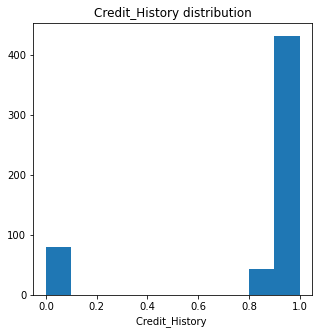

In [21]:
plt.figure(figsize=(5,5))
plt.hist(df['Credit_History'])
plt.title('Credit_History distribution')
plt.xlabel("Credit_History ")
plt.show()

In [22]:
#using ordinal encoder for converting categorical features into numeric values
#using label encoder for converting target column's value to numeric values
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
enc = OrdinalEncoder()
lbe = LabelEncoder()
df["Loan_ID"] = enc.fit_transform(df["Loan_ID"].values.reshape(-1,1))
df["Gender"] = enc.fit_transform(df["Gender"].values.reshape(-1,1))
df["Married"] = enc.fit_transform(df["Married"].values.reshape(-1,1))
df["Dependents"] = enc.fit_transform(df["Dependents"].values.reshape(-1,1))
df["Education"] = enc.fit_transform(df["Education"].values.reshape(-1,1))
df["Self_Employed"] = enc.fit_transform(df["Self_Employed"].values.reshape(-1,1))
df["Property_Area"] = enc.fit_transform(df["Property_Area"].values.reshape(-1,1))

df["Loan_Status"] = lbe.fit_transform(df["Loan_Status"].values.reshape(-1,1))

<ipython-input-22-d1f463caaa6e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Loan_ID"] = enc.fit_transform(df["Loan_ID"].values.reshape(-1,1))
<ipython-input-22-d1f463caaa6e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = enc.fit_transform(df["Gender"].values.reshape(-1,1))
<ipython-input-22-d1f463caaa6e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [23]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,549.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1
610,550.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1
611,551.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1
612,552.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1


In [24]:
#Checking correlation
df.corr()['Loan_Status'].sort_values()

Education           -0.082720
LoanAmount          -0.053817
ApplicantIncome     -0.042492
CoapplicantIncome   -0.037370
Self_Employed       -0.015924
Loan_Amount_Term    -0.005517
Dependents           0.006596
Loan_ID              0.016637
Gender               0.026701
Property_Area        0.036112
Married              0.101573
Credit_History       0.528949
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

<AxesSubplot:>

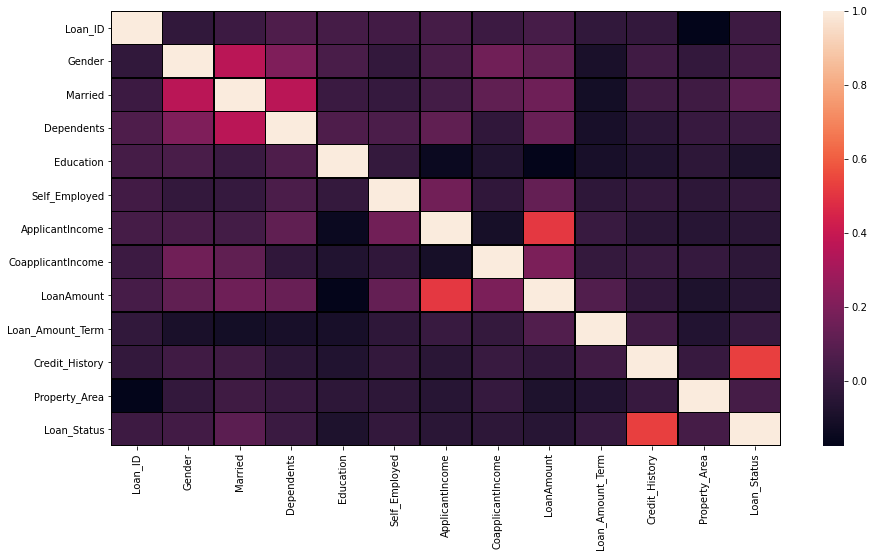

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), linewidths =0.5, linecolor ="black", fmt = ".2f")

In [26]:
#Checking skewness
df.skew()

Loan_ID              0.000000
Gender              -1.650104
Married             -0.646580
Dependents           0.979788
Education            1.341337
Self_Employed        2.114870
ApplicantIncome      6.881481
CoapplicantIncome    5.736590
LoanAmount           2.578663
Loan_Amount_Term    -2.463236
Credit_History      -1.972706
Property_Area       -0.054158
Loan_Status         -0.821489
dtype: float64

In [66]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,554.000000,554.000000,554.000000,554.000000,554.000000
mean,5267.059567,1585.575668,144.969009,341.956679,0.843348
std,5455.163295,2524.484889,81.078416,64.727653,0.349310
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.750000,0.000000,100.000000,360.000000,1.000000
50%,3839.500000,1149.000000,128.000000,360.000000,1.000000
75%,5818.750000,2297.250000,166.750000,360.000000,1.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000


There is little skewness in all columns

Loan_ID                 AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Gender               AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Married              AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Dependents           AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Education            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Self_Employed        AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
ApplicantIncome      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
CoapplicantIncome          AxesSubplot(0.125,0.125;0.0945122x0.343182)
LoanAmount              AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Loan_Amount_Term        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Credit_History          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Property_Area           AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Loan_Status             AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

<Figure size 21600x7200 with 0 Axes>

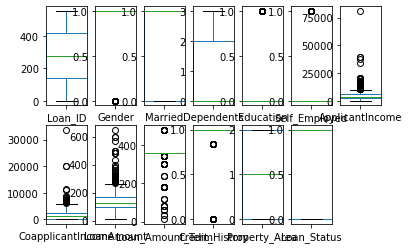

In [27]:
#Plotting boxplot to check outliers
plt.figure(figsize=(300,100))
df=df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
#checking outliers
df.plot(kind='box',widths=1,subplots=True,layout=(2,7))

Outliers are present in Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History

In [29]:
from scipy.stats import zscore

z= np.abs(zscore(df))
#np.where(z>3)
df_new = df[(z < 3).all(axis=1)]

In [31]:
#dividing data into x (input) and y (target) variables
x=df_new.drop(['Loan_Status'], axis=1)# independent variables
y=df_new['Loan_Status']#target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Model Selection

In [33]:
# Logistic Classifier

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


82.52

In [34]:
# KNeighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

79.94

In [35]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

80.8

In [36]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [37]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [38]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

70.2

In [39]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,acc_random_forest, acc_gaussian,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
5,Decision Tree,100.00
2,Logistic Regression,82.52
4,Naive Bayes,80.80
1,KNN,79.94
0,Support Vector Machines,70.20


Score is highest in Random Forest and Decision Tree hence selecting Random Forest

In [43]:
#Saving the model
import pickle
file_name = "churn.pkl"
pickle.dump(random_forest,open(file_name,"wb"))
#loading model
loaded_model = pickle.load(open("churn.pkl","rb"))
result = loaded_model.score(X_test,y_test)
print(result*100)

81.5028901734104
